In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


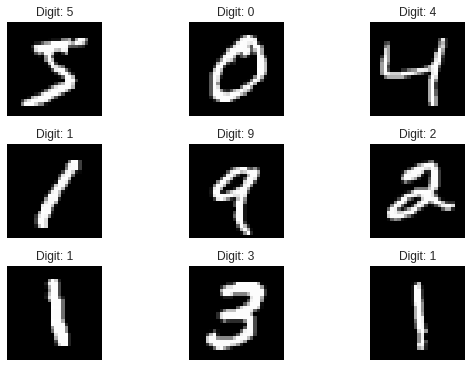

In [2]:
# plot some training examples
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.show()

In [3]:
# img dimensions
img_rows,img_cols=28,28
#reshaping
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
  X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# making values bw 0-1
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


In [0]:
import keras
#set number of categories
num_category = 10
# one hot enoding
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [31]:
#model 1 
# one more model added at the end
from keras.layers import Convolution2D,Activation,MaxPooling2D,Flatten,Dense,Dropout
from keras.models import Sequential

model = Sequential()

# convolution 2D
con1=Convolution2D(32, 3, 3, input_shape=input_shape)
model.add(con1) 
convout1 = Activation('relu')
model.add(convout1)

# max pooling 2D
convout2 = MaxPooling2D()
model.add(convout2)

# flatten input to 1D
model.add(Flatten())

# 128 neuron dense layer
model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.2))

# output layer with 10 neuron one for each digit
model.add(Dense(10))
model.add(Activation('softmax'))

# summarize model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               692352    
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  if __name__ == '__main__':


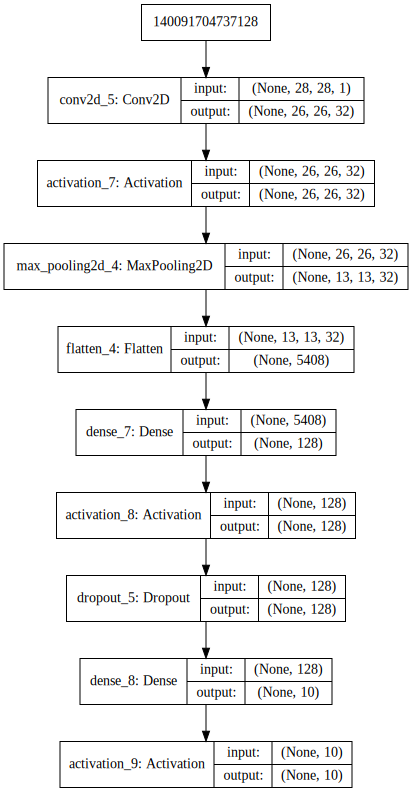

In [32]:
# visualize model
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True,show_layer_names=True,rankdir="TD").create(prog='dot', format='svg'))


In [0]:
# compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [34]:
batch_size = 128
num_epoch = 5
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.2702 - acc: 0.9208 - val_loss: 0.0908 - val_acc: 0.9728
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0887 - acc: 0.9740 - val_loss: 0.0593 - val_acc: 0.9801
Epoch 3/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0613 - acc: 0.9817 - val_loss: 0.0473 - val_acc: 0.9840
Epoch 4/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.0478 - acc: 0.9855 - val_loss: 0.0433 - val_acc: 0.9856
Epoch 5/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.0395 - acc: 0.9878 - val_loss: 0.0387 - val_acc: 0.9867


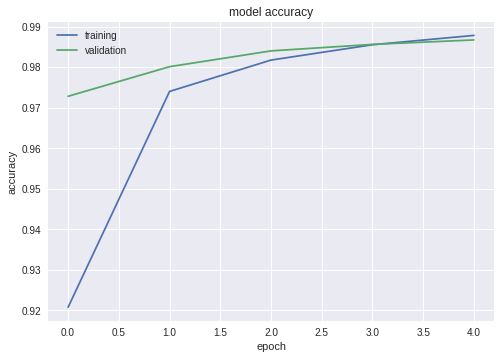


Test loss: 0.0387
Test accuracy: 0.987


In [39]:
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print()
loss, accuracy  = model.evaluate(X_test, y_test, verbose=False)

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [35]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
def predict(i):
  t=X_test[i]
  # print(t)
  plt.figure(figsize=(4,3))

  plt.subplot(1,2,1)
  plt.imshow(np.squeeze(t))
  # plt.show()
  # plt.imshow(t)

  t=t.reshape(1,28,28,1)
  prediction=model.predict(t)
  prediction=np.squeeze(prediction)
  prediction*=100
  l=np.arange(10)
  plt.subplot(1,2,2)
  plt.barh(l,
          prediction,
          height=.7,
#           log=True, #enable logarithmic scale
          )
  plt.xlabel('Confidence', fontsize=20)
  plt.ylabel('Number', fontsize=20)

  plt.yticks(l, l, rotation=0)
  plt.show()


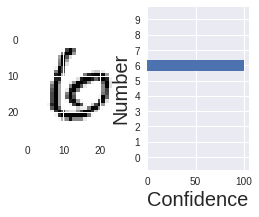

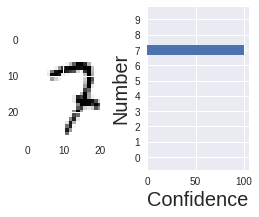

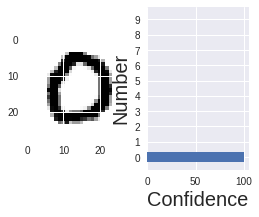

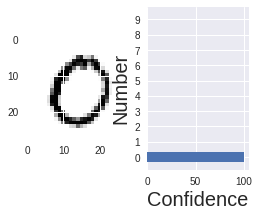

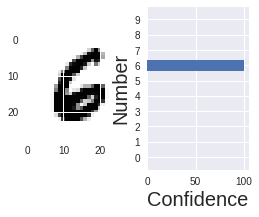

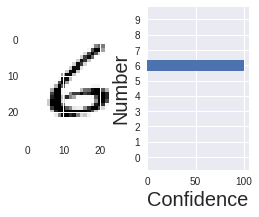

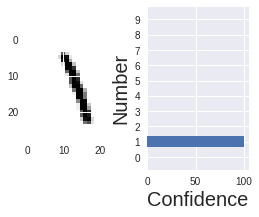

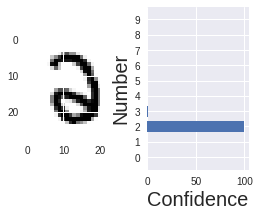

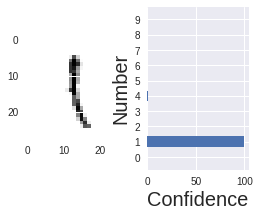

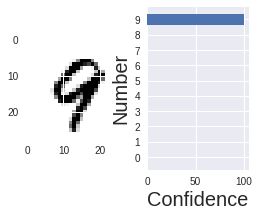

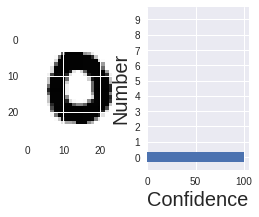

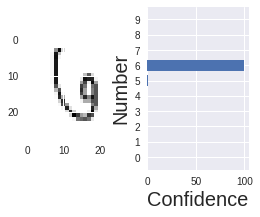

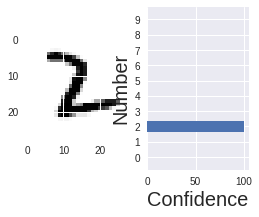

In [144]:
a=np.arange(11,400,30)

for i in a:
  predict(i)

In [0]:

# def layer_to_visualize(layer,img):
#     img_to_visualize=img
#     inputs = [K.learning_phase()] + model.inputs

#     _convout1_f = K.function(inputs, [layer.output])
#     def convout1_f(X):
#         # The [0] is to disable the training phase flag
#         return _convout1_f([0] + [X])

#     convolutions = convout1_f(img_to_visualize)
#     convolutions = np.squeeze(convolutions)

#     print ('Shape of conv:', convolutions.shape)
    
#     n = convolutions.shape[0]
#     n = int(np.ceil(np.sqrt(n)))
    
#     # Visualization of each filter of the layer
#     fig = plt.figure(figsize=(12,8))
#     for i in range(len(convolutions)):
#         ax = fig.add_subplot(n,n,i+1)
#         ax.imshow(convolutions[i], cmap='gray')

In [0]:
# import numpy as np
# # choose any image to want by specifying the index
# img = X_train[7]

# plt.imshow(np.squeeze(img))

# # Keras requires the image to be in 4D
# # So we add an extra dimension to it.
# img = np.expand_dims(img, axis=0)
# layer_to_visualize(con1,img)
# # layer_to_visualize(conv1,img)
# # layer_to_visualize(convout1,img)

# # layer_to_visualize(convout2,img)
# # layer_to_visualize(dense1,X_train[10])



In [0]:
# from keras.models import Sequential
# from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
# ##model building
# model = Sequential()
# #convolutional layer with rectified linear unit activation
# model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
# #32 convolution filters used each of size 3x3
# #again
# conv1=Conv2D(64, (3, 3), activation='relu')
# model.add(conv1)
# #64 convolution filters used each of size 3x3
# #choose the best features via pooling
# maxp1=MaxPooling2D(pool_size=(2, 2))
# model.add(maxp1)
# #randomly turn neurons on and off to improve convergence
# model.add(Dropout(0.25))
# #flatten since too many dimensions, we only want a classification output
# model.add(Flatten())
# #fully connected to get all relevant data
# dense1=Dense(128, activation='relu')
# model.add(dense1)
# #one more dropout for convergence' sake :) 
# model.add(Dropout(0.5))
# #output a softmax to squash the matrix into output probabilities
# model.add(Dense(num_category, activation='softmax'))

# model.summary()